Deux particule, chaqu'une dans une pince optique 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

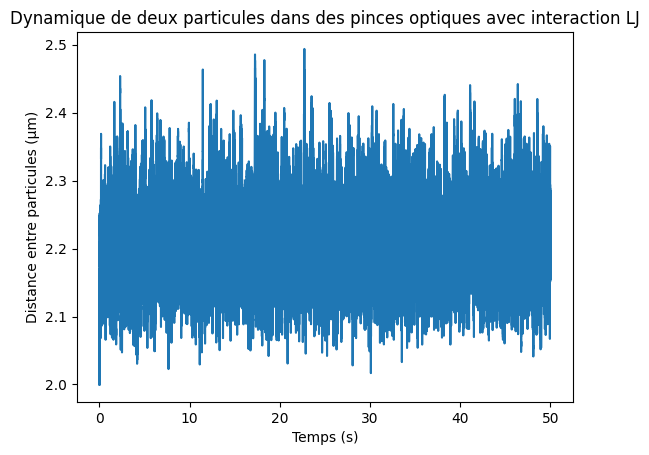

Mode de la distribution: 2.20 µm


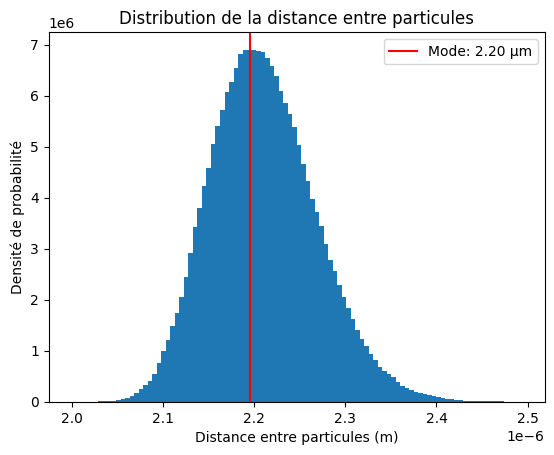

In [13]:


# --- Paramètres physiques ---
a = 1e-6       # rayon de la particule (m)
A = 1e-6       # position du centre d'une pince (m)
r0 = 2*A       # distance entre les centres des pinces
kappa = 0.2e-6 # rigidité de la pince (N/m)
eta = 1e-3     # viscosité (Pa.s)
T = 300        # température (K)
kB = 1.38e-23  # constante de Boltzmann (J/K)
gamma = 6 * np.pi * eta * a  # friction (kg/s)
D = kB * T / gamma           # diffusion (m^2/s)
sigma = 2e-6                 # paramètre LJ (m)
epsilon = 6 * kB * T         # profondeur du potentiel
Ndt = int(1e7)               # nombre de pas de temps
dt = 5e-6                    # pas de temps (s)

def prochaine_position (r,A):
    """ prochaine_position calcule la distance entre deux particules à l'instant suivant
    INPUTS: 
        r (float): distance entre les particules à l'instant courant (m)
        A (float): position d'une pince (m)
        F_trap (float): force de la pince optique (N)
        F_pair (float): force d'interaction de Lennard-Jones (N)
        F_random (float): force aléatoire due au bruit thermique (N)
    OUTPUT:
        r_next (float): distance entre les particules à l'instant suivant (m)"""
    F_trap = kappa * (2*A - r) # force de la pince optique, si r > 2A, la force est attractive et vice versa (si r = 2A, la force est nulle)
    F_pair = 24 * epsilon * (2 * (sigma**12) / (r**13) - (sigma**6) / (r**7)) # force d'interaction de Lennard-Jones (N)
    F_random = np.sqrt(2 * kB * T * dt / gamma) * np.random.normal(0, 1)
    r_next = r + (F_trap + 2 * F_pair) * dt / gamma + F_random
    return r_next


#La figure ci-dessous simule la dynamique de deux particules dans des pinces optiques avec interaction de Lennard-Jones
plt.figure()
r_values = np.zeros(Ndt) # tableau pour stocker les distances entre particules
r_values[0] = 2 * A   # position initiale 
for i in range(1, Ndt): 
    r_values[i] = prochaine_position(r_values[i-1],A)
plt.plot(np.arange(Ndt) * dt, r_values * 1e6)
plt.xlabel('Temps (s)')
plt.ylabel('Distance entre particules (µm)')
plt.title('Dynamique de deux particules dans des pinces optiques avec interaction LJ')
plt.show()  

# Analyse statistique de la distance entre particules après équilibre. On a ajouté le calcul du mode de la distribution.

r_eq = r_values[int(0.1*len(r_values)):]  # données après l'équilibre
counts, bins = np.histogram(r_eq, bins=100, density=True) 
bin_centers = 0.5 * (bins[1:] + bins[:-1])

mode_index = np.argmax(counts)
mode_r = bin_centers[mode_index]

print(f'Mode de la distribution: {mode_r*1e6:.2f} µm')

plt.hist(r_values, bins=100, density=True)
plt.axvline(mode_r, color='r', label=f'Mode: {mode_r*1e6:.2f} µm')
plt.legend()
plt.xlabel('Distance entre particules (m)')
plt.ylabel('Densité de probabilité')
plt.title('Distribution de la distance entre particules')
plt.show()



La courbe est assymétrique, c'est à quoi nous nous attendions.

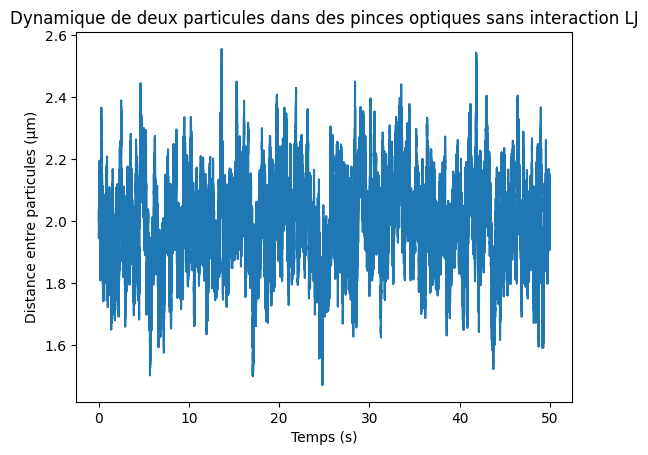

Mode de la distribution sans LJ: 1.99 µm


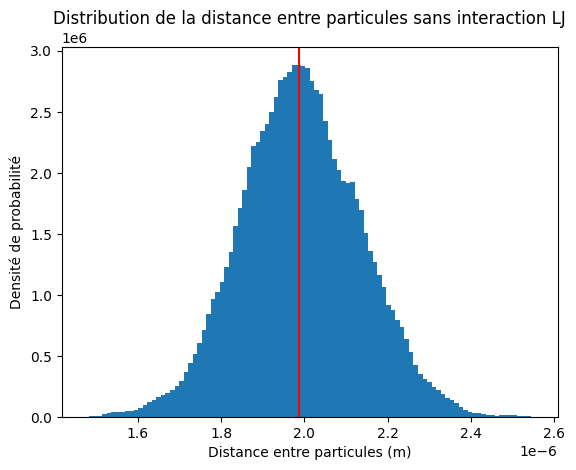

In [ ]:
#La même chose qu'avant mais sans interaction de Lennard-Jones
def prochaine_position_sans_LJ (r,A): 
    """ prochaine_position_sans_LJ calcule la distance entre deux particules à l'instant suivant sans interaction LJ
    INPUTS: 
        r (float): distance entre les particules à l'instant courant (m)
        A (float): position d'une pince (m)
        F_trap (float): force de la pince optique (N)
        F_random (float): force aléatoire due au bruit thermique (N)
    OUTPUT:
        r_next (float): distance entre les particules à l'instant suivant (m)
        """

    F_trap =  kappa * (2*A- r)
    F_random = np.sqrt(2 * kB * T * dt /gamma ) * np.random.normal(0, 1)
    r_next =r+ F_trap * dt / gamma + F_random
    return r_next
plt.figure()
r_values_no_LJ = np.zeros(Ndt)
r_values_no_LJ[0] = 2*A   # position initiale 
for i in range(1, Ndt):
    r_values_no_LJ[i] = prochaine_position_sans_LJ(r_values_no_LJ[i-1],A)
plt.plot(np.arange(Ndt) * dt, r_values_no_LJ * 1e6)
plt.xlabel('Temps (s)')
plt.ylabel('Distance entre particules (µm)')
plt.title('Dynamique de deux particules dans des pinces optiques sans interaction LJ')
plt.show()  


# Analyse statistique de la distance entre particules après équilibre sans interaction LJ. Calcul du mode de la distribution.
r_eq = r_values_no_LJ[int(0.1*len(r_values_no_LJ)):]  # données après l'équilibre
counts, bins = np.histogram(r_eq, bins=100, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

mode_index = np.argmax(counts)
mode_r_no_LJ = bin_centers[mode_index]

print(f'Mode de la distribution sans LJ: {mode_r_no_LJ*1e6:.2f} µm')

plt.hist(r_values_no_LJ, bins=100, density=True)
plt.axvline(mode_r_no_LJ, color='r', label=f'Mode: {mode_r_no_LJ*1e6:.2f} µm')
plt.xlabel('Distance entre particules (m)')
plt.ylabel('Densité de probabilité')
plt.title('Distribution de la distance entre particules sans interaction LJ')
plt.show()

Pour pouvoir recéer la courbe du potentiel de Lennard Jones, il faut faire la même chose que ci-dessus (histogrames avec et sans la force de Lennard Jones) puis utiliser ces donnée avec différentes valeures de A. Ceci devrait nous donner des parties de la courbe du potentielle que l'on pourra remmettre ensemble en une courbe du potentiel selon (r) soit la distance entre les deux particules.

Comme il est long de faire ces simulations avec une grande précision, c'était mon choix de séparé les simulations par 3 groupes de 3. Ainsi, il est possible de faire des changement de paramêtre et de relancer les simulations sans devoir refaire l'entièreté du programme.

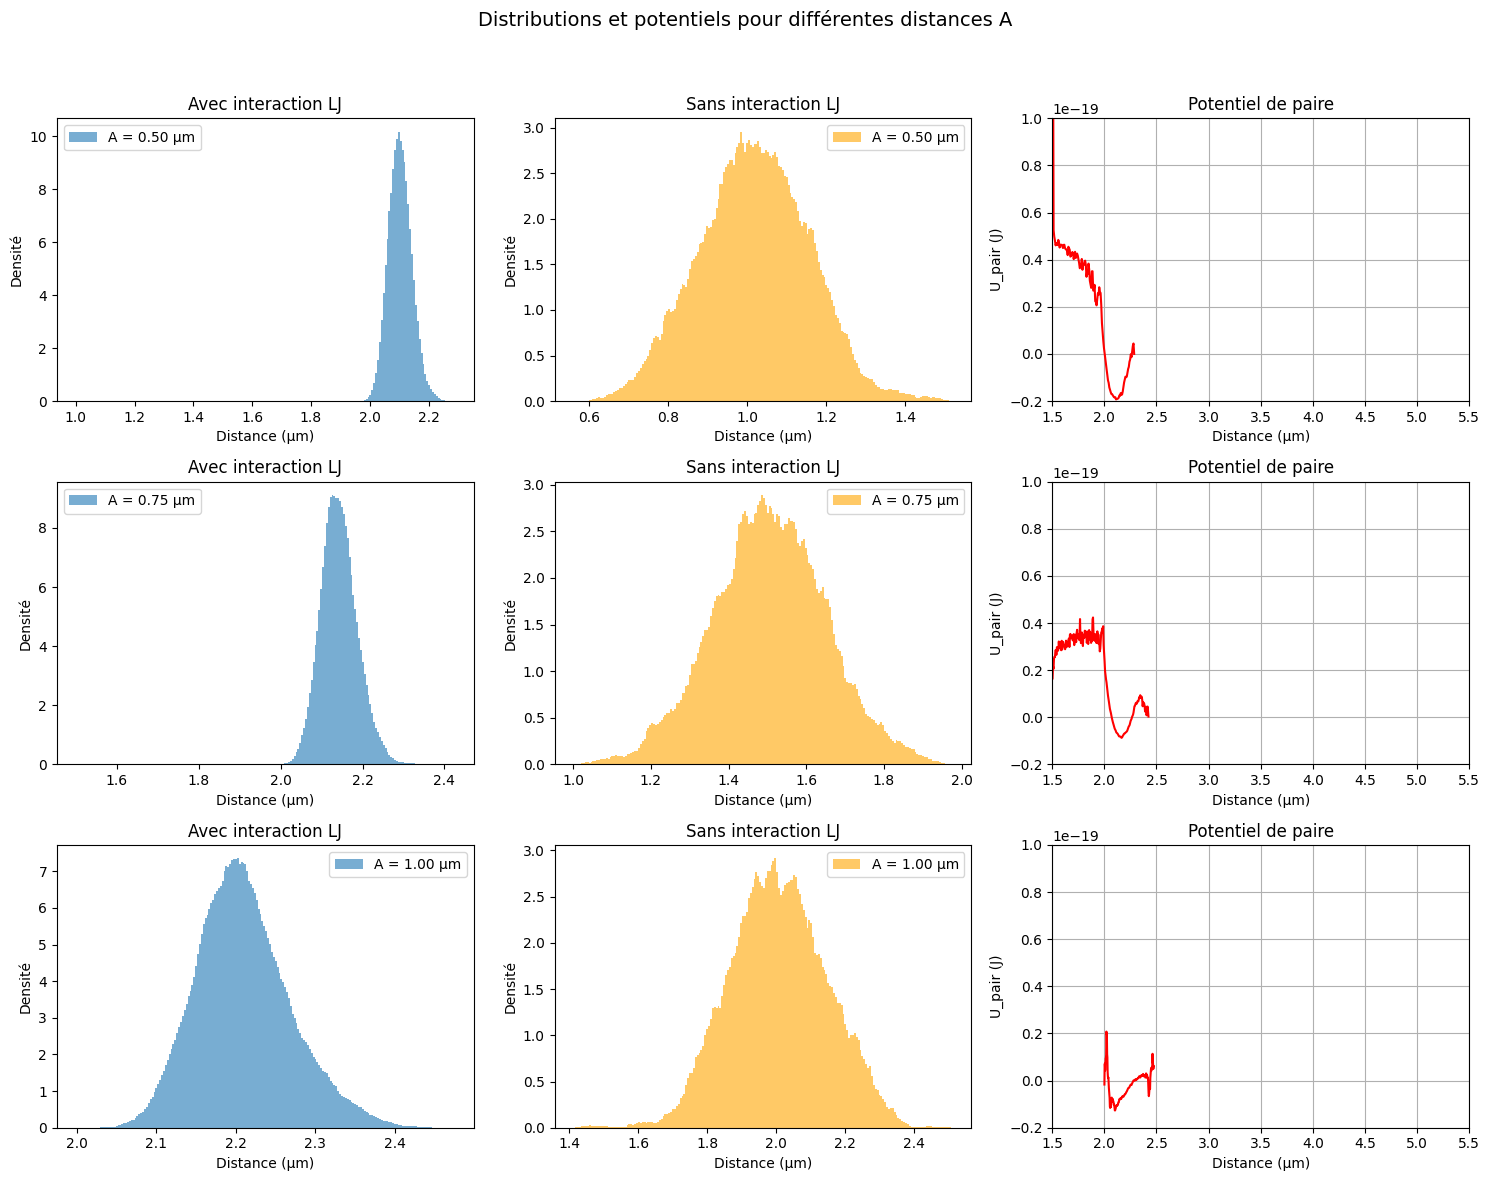

In [ ]:
# --- Paramètres communs ---
Ndt = int(2e7)               # nombre de pas de temps
dt = 1e-6                    # pas de temps (s)
A_list = [0.5e-6, 0.75e-6, 1.0e-6]   # trois valeure de A entre pinces (m)
n_bins = 200

fig, axes = plt.subplots(len(A_list), 3, figsize=(15, 4*len(A_list)))  # 3 colonnes : avec LJ, sans LJ, potentiel
fig.suptitle("Distributions et potentiels pour différentes distances A", fontsize=14)

for idx, A_i in enumerate(A_list): # boucle sur les différentes valeurs de A
    # --- Simulation avec et sans Lennard-Jones ---
    r_values = np.zeros(Ndt) # tableau pour stocker les distances entre particules
    r_values[0] = 2 * A_i # position initiale
    for i in range(1, Ndt):
        r_values[i] = prochaine_position(r_values[i-1], A_i) #

    r_values_no_LJ = np.zeros(Ndt) 
    r_values_no_LJ[0] = 2 * A_i
    for i in range(1, Ndt):
        r_values_no_LJ[i] = prochaine_position_sans_LJ(r_values_no_LJ[i-1], A_i)

    # --- Histogrammes et calcul du potentiel ---
    hist_with_LJ, bin_edges = np.histogram(r_values, bins=n_bins, density=True)
    hist_without_LJ, _ = np.histogram(r_values_no_LJ, bins=n_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    hist_with_LJ_clipped = np.clip(hist_with_LJ, 1e-10, None) # ceci sert à éviter log(0). np.clip(array, min, max)
    hist_without_LJ_clipped = np.clip(hist_without_LJ, 1e-10, None)
    U_pair = -kB * T * np.log(hist_with_LJ_clipped / hist_without_LJ_clipped)

    # --- Graphes ---
    ax_with, ax_without, ax_U = axes[idx] if len(A_list) > 1 else axes  # compatibilité 1D ou 2D

    # Avec interaction LJ
    ax_with.hist(r_values*1e6, bins=200, density=True, alpha=0.6, label=f"A = {A_i*1e6:.2f} µm")
    ax_with.set_xlabel("Distance (µm)")
    ax_with.set_ylabel("Densité")
    ax_with.set_title("Avec interaction LJ")
    ax_with.legend()

    # Sans interaction LJ
    ax_without.hist(r_values_no_LJ*1e6, bins=200, density=True, alpha=0.6, color="orange", label=f"A = {A_i*1e6:.2f} µm")
    ax_without.set_xlabel("Distance (µm)")
    ax_without.set_ylabel("Densité")
    ax_without.set_title("Sans interaction LJ")
    ax_without.legend()

    # Potentiel U_pair(r)
    ax_U.plot(bin_centers*1e6, U_pair, color="red")
    ax_U.set_xlabel("Distance (µm)")
    ax_U.set_ylabel("U_pair (J)")
    ax_U.set_title("Potentiel de paire")
    ax_U.set_xlim(1.5, 5.5)
    ax_U.set_ylim(-2e-20, 10e-20)
    ax_U.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


On peut voir que les deux premier se superpose, on en aurait besoin qu'un des deux par exemple. 

Ensuite c'est la même chose mais avec 3 valeures de A un peu plus grande.

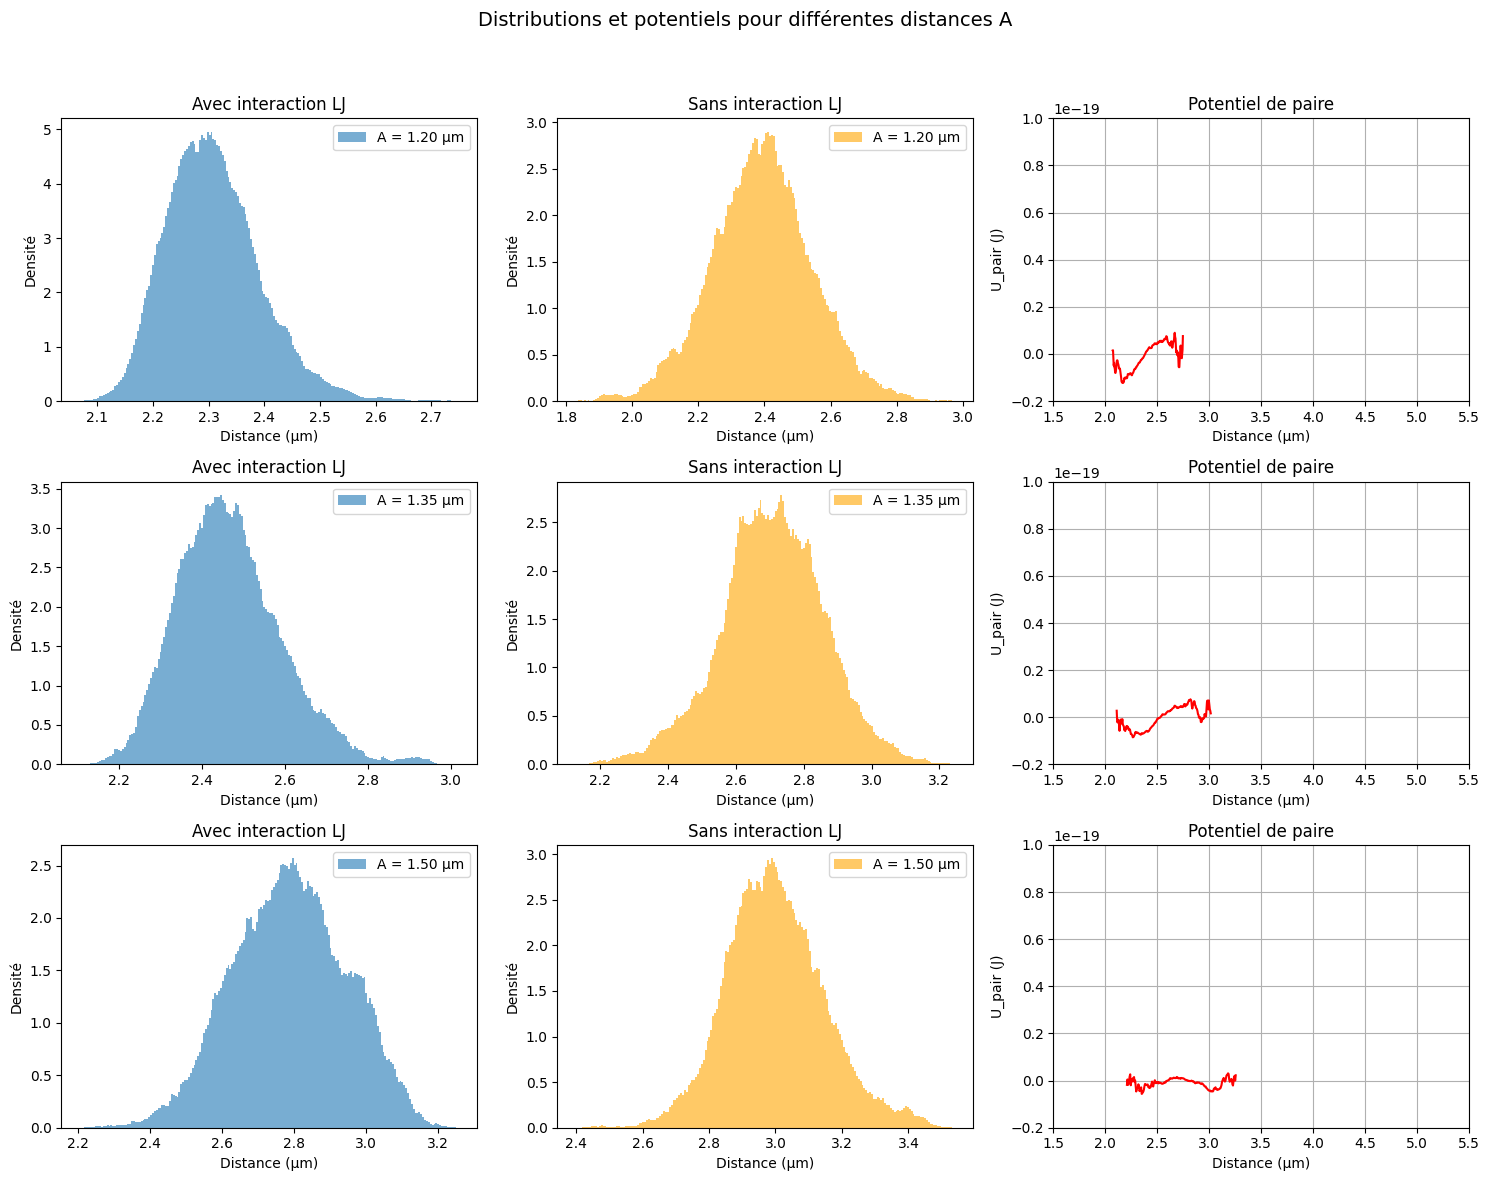

In [4]:
Ndt = int(2e7)               # nombre de pas de temps
dt = 1e-6       
# --- Paramètres communs ---
A_list = [1.2e-6, 1.35e-6, 1.5e-6]   # trois distances entre pinces (m)
n_bins = 200

fig, axes = plt.subplots(len(A_list), 3, figsize=(15, 4*len(A_list)))  # 3 colonnes : avec LJ, sans LJ, potentiel
fig.suptitle("Distributions et potentiels pour différentes distances A", fontsize=14)

for idx, A_i in enumerate(A_list):
    # --- Simulation avec et sans Lennard-Jones ---
    r_values = np.zeros(Ndt)
    r_values[0] = 2 * A_i
    for i in range(1, Ndt):
        r_values[i] = prochaine_position(r_values[i-1], A_i)

    r_values_no_LJ = np.zeros(Ndt)
    r_values_no_LJ[0] = 2 * A_i
    for i in range(1, Ndt):
        r_values_no_LJ[i] = prochaine_position_sans_LJ(r_values_no_LJ[i-1], A_i)

    # --- Histogrammes et calcul du potentiel ---
    hist_with_LJ, bin_edges = np.histogram(r_values, bins=n_bins, density=True)
    hist_without_LJ, _ = np.histogram(r_values_no_LJ, bins=n_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    hist_with_LJ_clipped = np.clip(hist_with_LJ, 1e-10, None)
    hist_without_LJ_clipped = np.clip(hist_without_LJ, 1e-10, None)
    U_pair = -kB * T * np.log(hist_with_LJ_clipped / hist_without_LJ_clipped)

    # --- Graphes ---
    ax_with, ax_without, ax_U = axes[idx] if len(A_list) > 1 else axes  # compatibilité 1D ou 2D

    # Avec interaction LJ
    ax_with.hist(r_values*1e6, bins=200, density=True, alpha=0.6, label=f"A = {A_i*1e6:.2f} µm")
    ax_with.set_xlabel("Distance (µm)")
    ax_with.set_ylabel("Densité")
    ax_with.set_title("Avec interaction LJ")
    ax_with.legend()

    # Sans interaction LJ
    ax_without.hist(r_values_no_LJ*1e6, bins=200, density=True, alpha=0.6, color="orange", label=f"A = {A_i*1e6:.2f} µm")
    ax_without.set_xlabel("Distance (µm)")
    ax_without.set_ylabel("Densité")
    ax_without.set_title("Sans interaction LJ")
    ax_without.legend()

    # Potentiel U_pair(r)
    ax_U.plot(bin_centers*1e6, U_pair, color="red")
    ax_U.set_xlabel("Distance (µm)")
    ax_U.set_ylabel("U_pair (J)")
    ax_U.set_title("Potentiel de paire")
    ax_U.set_xlim(1.5, 5.5)
    ax_U.set_ylim(-2e-20, 10e-20)
    ax_U.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Le premier graphe montre que la courbe remonte vers 0 et le dernier commence déjà à s'applatir.

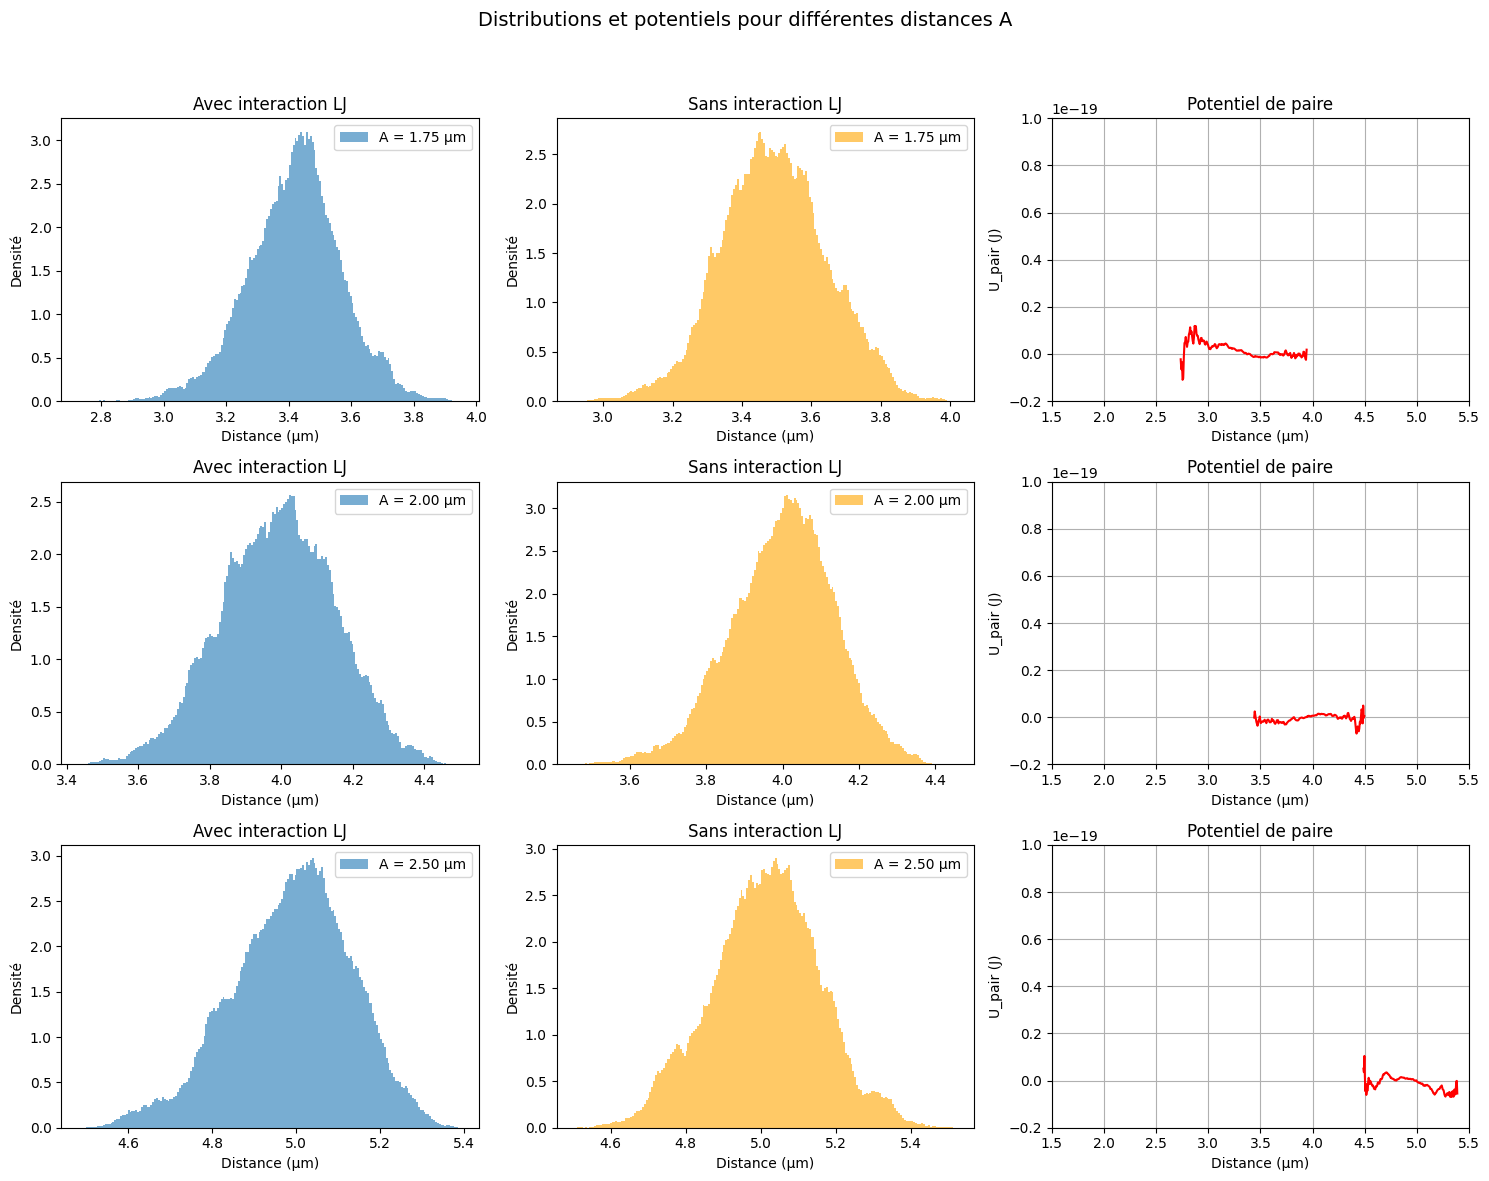

In [5]:
# --- Paramètres communs ---
A_list = [1.75e-6, 2e-6, 2.5e-6]   # trois distances entre pinces (m)
n_bins = 200

fig, axes = plt.subplots(len(A_list), 3, figsize=(15, 4*len(A_list)))  # 3 colonnes : avec LJ, sans LJ, potentiel
fig.suptitle("Distributions et potentiels pour différentes distances A", fontsize=14)

for idx, A_i in enumerate(A_list):
    # --- Simulation avec et sans Lennard-Jones ---
    r_values = np.zeros(Ndt)
    r_values[0] = 2 * A_i
    for i in range(1, Ndt):
        r_values[i] = prochaine_position(r_values[i-1], A_i)

    r_values_no_LJ = np.zeros(Ndt)
    r_values_no_LJ[0] = 2 * A_i
    for i in range(1, Ndt):
        r_values_no_LJ[i] = prochaine_position_sans_LJ(r_values_no_LJ[i-1], A_i)

    # --- Histogrammes et calcul du potentiel ---
    hist_with_LJ, bin_edges = np.histogram(r_values, bins=n_bins, density=True)
    hist_without_LJ, _ = np.histogram(r_values_no_LJ, bins=n_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    hist_with_LJ_clipped = np.clip(hist_with_LJ, 1e-10, None)
    hist_without_LJ_clipped = np.clip(hist_without_LJ, 1e-10, None)
    U_pair = -kB * T * np.log(hist_with_LJ_clipped / hist_without_LJ_clipped)

    # --- Graphes ---
    ax_with, ax_without, ax_U = axes[idx] if len(A_list) > 1 else axes  # compatibilité 1D ou 2D

    # Avec interaction LJ
    ax_with.hist(r_values*1e6, bins=200, density=True, alpha=0.6, label=f"A = {A_i*1e6:.2f} µm")
    ax_with.set_xlabel("Distance (µm)")
    ax_with.set_ylabel("Densité")
    ax_with.set_title("Avec interaction LJ")
    ax_with.legend()

    # Sans interaction LJ
    ax_without.hist(r_values_no_LJ*1e6, bins=200, density=True, alpha=0.6, color="orange", label=f"A = {A_i*1e6:.2f} µm")
    ax_without.set_xlabel("Distance (µm)")
    ax_without.set_ylabel("Densité")
    ax_without.set_title("Sans interaction LJ")
    ax_without.legend()

    # Potentiel U_pair(r)
    ax_U.plot(bin_centers*1e6, U_pair, color="red")
    ax_U.set_xlabel("Distance (µm)")
    ax_U.set_ylabel("U_pair (J)")
    ax_U.set_title("Potentiel de paire")
    ax_U.set_xlim(1.5, 5.5)
    ax_U.set_ylim(-2e-20, 10e-20)
    ax_U.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Il est claire, dans ces trois graphes, que la valeure est très proche de 0 quand la distance augmente. C'est presque plat mis à part le bruit bien sur.

On veut ensuite comparer la vrai valeure théorique (la vraie courbe) à la notre. En-dessous, on a mis la formule pour la courbe avec la formule que l'on a dérivé pour trouver la force de Lennard-Jones.

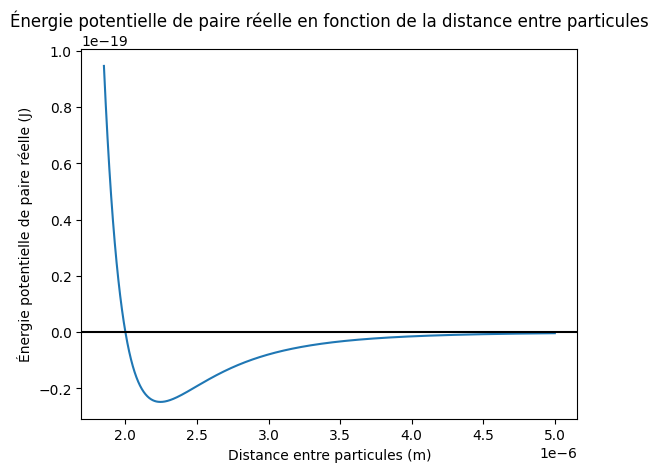

In [ ]:
def real_u_pair(r):
    """ real_u_pair calcule l'énergie potentielle de paire réelle selon le potentiel de Lennard-Jones
    INPUTS:
        r (float or np.array): distance entre les particules (m)
    OUTPUT:
        reUpair (float or np.array): énergie potentielle de paire réelle (J)"""
    reUpair = 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return reUpair
r = np.linspace(1.85e-6, 5e-6, 1000)


real_u_pair = real_u_pair(r)
plt.plot(r, real_u_pair)
axhline = plt.axhline(0, color='black')
plt.ylabel('Énergie potentielle de paire réelle (J)')
plt.xlabel('Distance entre particules (m)')
plt.title('Énergie potentielle de paire réelle en fonction de la distance entre particules')
plt.show()

On peut voir une courbe lisse et nette. Elle descend un peu après 2 micromètre et remonte gentillement vers 0 vers environ 4 micromètre. Elle descend un peu en dessous de -0.2 joule.

Notre courbe (en-dessous), qui a été faite en prenant des bout de courbes parmis les 9 différents A, subit beaucoup le bruit. Cela produit des petites montagnes un peu partout. Pour ce débarasser du bruit il faudrait faire des simulation plus longue avec plus de pas. Au départ, notre courbe descend tout come la courbe théorique (un peu après 2 micromètre jusqu'à -0.2 joule). Mais ensuite, notre courbe remontre trop haut trop rapidement, surement à cause du bruit, qui pousse notre mesure plus rapidement vers le haut, et donc elle reste vers le haut après être montée...
Si l'on ignore le bruit on remarque que la fin de notre courbe est relativement plat comme prévu.

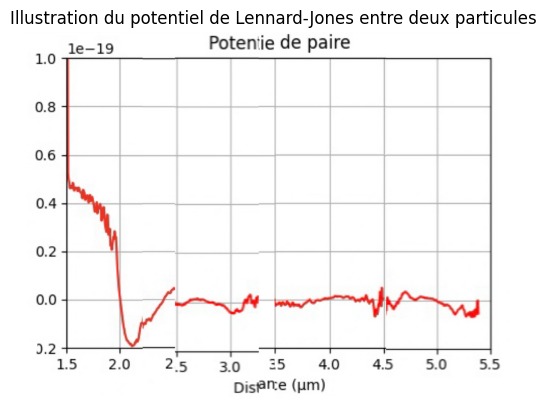

In [12]:
img = mpimg.imread("IMG_0498.jpg")

plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.title("Illustration du potentiel de Lennard-Jones entre deux particules")
plt.show()